In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load Data

In [9]:
# load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

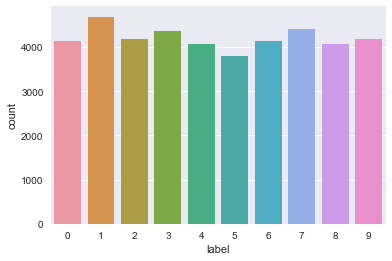

In [10]:
y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

sns.countplot(y_train)

### Prepare Training Data

In [11]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# reshape data into image format for training
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
from keras.utils.np_utils import to_categorical

# obtain hot vectors
y_train = to_categorical(y_train, num_classes=10)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Define model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator


def Model():

    model = Sequential()

    # model architects
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(1024, activation = "relu"))
    model.add(Dense(512, activation = "relu"))
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(10, activation = "softmax"))
    
    return model

### Data Augmentation

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Train model

In [21]:
epochs = 20
batch_size = 86

# model
model = Model()

# define optimizer
opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-07, decay=0.0)

#compile the model
model = Model()
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
 - 10s - loss: 0.5272 - acc: 0.8653 - val_loss: 0.1225 - val_acc: 0.9689
Epoch 2/20
 - 9s - loss: 0.1418 - acc: 0.9619 - val_loss: 0.0862 - val_acc: 0.9805
Epoch 3/20
 - 9s - loss: 0.1160 - acc: 0.9713 - val_loss: 0.0539 - val_acc: 0.9854
Epoch 4/20
 - 9s - loss: 0.1121 - acc: 0.9726 - val_loss: 0.0492 - val_acc: 0.9876
Epoch 5/20
 - 9s - loss: 0.1055 - acc: 0.9764 - val_loss: 0.0522 - val_acc: 0.9880
Epoch 6/20
 - 9s - loss: 0.0919 - acc: 0.9782 - val_loss: 0.0434 - val_acc: 0.9887
Epoch 7/20
 - 9s - loss: 0.0900 - acc: 0.9784 - val_loss: 0.1078 - val_acc: 0.9730
Epoch 8/20
 - 9s - loss: 0.0932 - acc: 0.9800 - val_loss: 0.0665 - val_acc: 0.9798
Epoch 9/20
 - 9s - loss: 0.0860 - acc: 0.9812 - val_loss: 0.0422 - val_acc: 0.9888
Epoch 10/20
 - 9s - loss: 0.0794 - acc: 0.9819 - val_loss: 0.0421 - val_acc: 0.9907
Epoch 11/20
 - 9s - loss: 0.0784 - acc: 0.9825 - val_loss: 0.0333 - val_acc: 0.9918
Epoch 12/20
 - 9s - loss: 0.0812 - acc: 0.9834 - val_loss: 0.0362 - val_acc: 0.9918


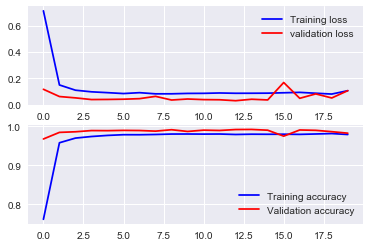

In [18]:
### Evaluate the model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
### output results for submission

results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results, name="Label")

# create submission file
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)